<a href="https://colab.research.google.com/github/DCI-alxogm/ML2023/blob/main/Nov3-4/LogisticReg_as_NN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cargamos los datos que vamos a trabajar.

In [ ]:
#Los datos corresponden a un subset del dataset cats vs dogs de https://www.kaggle.com/c/dogs-vs-cats
files=glob.glob('/content/drive/MyDrive/DCI_data/ML2023/CAT_DOG/train/*')

In [ ]:
len(files)

4340

In [ ]:
#numero de pixeles para nuestras imágenes.
num_px=64

Veamos algunas de las imagenes

Preparamos el dataset de entrenamiento.

In [ ]:
train_x=[]
train_y=[]
for file in files[:100]:
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
train_y=np.asarray(train_y)
train_x=np.asarray(train_x)

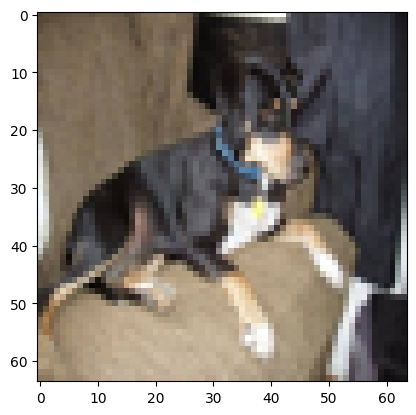

In [ ]:
plt.imshow(train_x[0])


Preparamos el dataset de prueba

In [ ]:
test_x=[]
test_y=[]
for file in files[4300:]:
    #print(file)
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
test_y=np.asarray(test_y)
test_x=np.asarray(test_x)

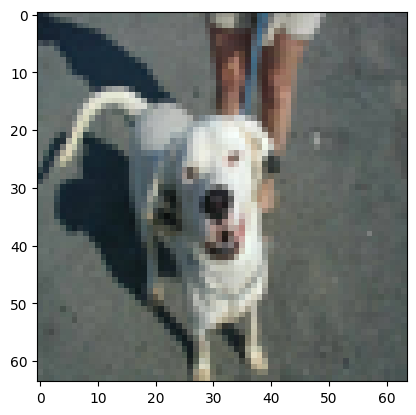

In [ ]:
plt.imshow(test_x[1])

Hacemos una transformación de los arreglos que contienen las imagenes para que sean arreglos de una dimensión.

In [ ]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T

test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y=train_y.reshape((1,train_y.shape[0]))
test_set_y=test_y.reshape((1,test_y.shape[0]))

Normalizamos las imágenes

In [ ]:
train_set_x= train_x_flatten/255
test_set_x= test_x_flatten/255

Ya esta listo nuestro set de datos para poder trabajar con el.